In [265]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [266]:
X = np.load("data1.npy")
X.shape

(300, 2)

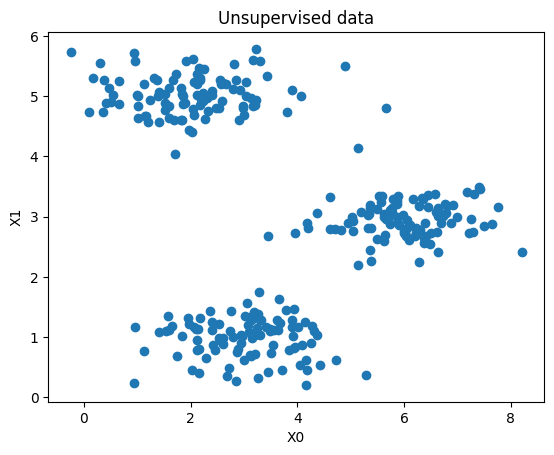

In [267]:
fig, ax = plt.subplots()
ax.set_title("Unsupervised data")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
ax.scatter(X[:,0], X[:,1])
plt.show()

# K-means algorithm
## We want to use clustring algorithm to make 3 groups from the dataset

In [268]:
def find_closest_centroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        distance = []
        for j in range(K):
            norm = np.linalg.norm(X[i] - centroids[j])
            distance.append(norm)
        idx[i] = np.argmin(distance)
    return idx

In [269]:
def compute_centroids(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))
    for i in range(K):
        Ck = idx == i
        centroids[i] = np.mean(X[Ck], axis = 0)
    return centroids   

In [270]:
def run_K_means(X, initial_centroids, max_iters=10):
    centroids = initial_centroids
    K = initial_centroids.shape[0]
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, K)
    return centroids, idx

In [271]:
def kMeans_init_centroids(X, K):
    randidx = np.random.permutation(X.shape[0])
    centroids = X[randidx[:K]]
    return centroids

In [272]:
def plot_data_points(X, idx, K):
    fig, ax = plt.subplots()
    for i in range(K):
        ax.scatter(X[idx == i , 0], X[idx == i , 1])

In [275]:
init_centroids = kMeans_init_centroids(X, K = 3)
centroids, idx = run_K_means(X, init_centroids, max_iters=10)
centroids

array([[6.03366736, 3.00052511],
       [1.95399466, 5.02557006],
       [3.04367119, 1.01541041]])

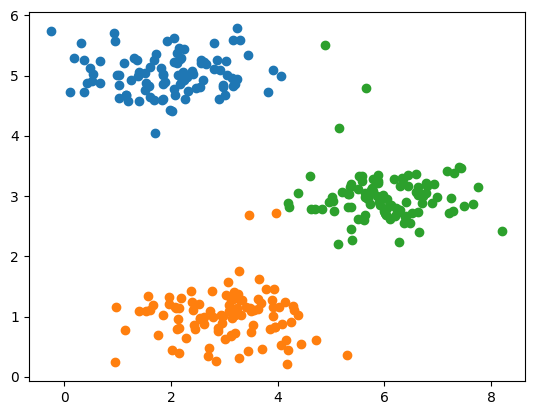

In [274]:
plot_data_points(X, idx, K = 3)